# Actividades de clase, semanas 4, 5 y 6.

La practica consta de 3 módulos, el objetivo es afianzar los conceptos vistos sobre transformaciones afines de la imagen, transformaciones no lineales e introducir los conceptos de convolución y ruido, encontrarán actividades para los módulos I y II, y una introducción al módulo III, que se extenderá hasta el día martes 25 de junio.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

Ayuda: Recuerde que la matriz afin de inclinación, viene dada por:

<img src = "res/mat.png">

Adicionalmente, recuerde que para aplicar la transformación afín sobre la imagen, puede utilizar la función de OpenCv, "cv2.warpAffine"

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

# Solución Módulo I
## 1. Transformaciones geométricas de reflexión y rotación
### a) Reflexión

Text(0.5, 1.0, 'Transformación geométrica')

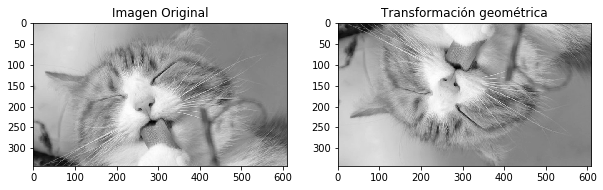

In [2]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Generar la matriz de reflexión en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación de reflexión Y a la imagen
ref_y = cv2.warpAffine(img,matriz_afin_ref_y,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_y,cmap='gray')
plt.title("Transformación geométrica")


Se cargó la imagen en escalas de grises luego se generó una matriz reflexión en Y para crear la misma imagen, luego a esta imagen se le aplico la transformación de reflexión en Y.

### b) Rotación y reflexión

[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


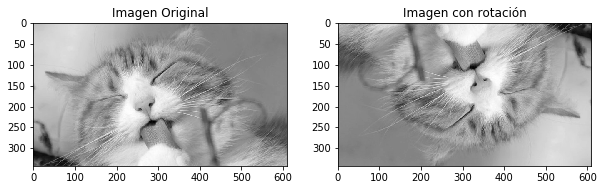

In [8]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen con rotación");

Se usó la misma imagen cargada en escalas de grises, se definió un ángulo de rotación y eje de rotación  para calcular la matriz y luego ser aplicada a la imagen leída.; luego se genera una reflexión horizontal que sería en x.

Text(0.5, 1.0, 'Reflexión horizontal')

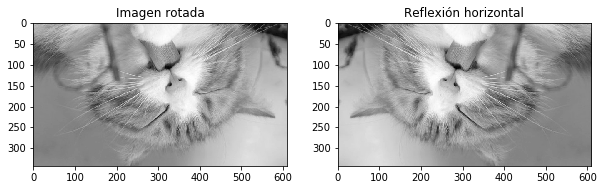

In [9]:

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(rot,cmap='gray')
plt.title("Imagen rotada")

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexión horizontal")


## 2. Transformacion geométrica de inclinación

Text(0.5, 1.0, 'Imagen Salida')

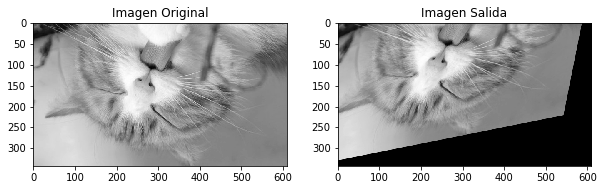

In [10]:
#Con base en la teoría, crear la matriz M de inclinación
#reemplazando los valores b y d
inc_x = -0.2
inc_y = -0.2
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen leída
inc = cv2.warpAffine(ref_x,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(ref_x,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(inc,cmap='gray')
plt.title("Imagen Salida")

Se crea una matriz de inclinación para reemplazar los valores de los pixeles b y d iniciales, para obtener la nueva imagen rotada. 

## 3. Operación entre imágenes
### a) Multiplicación y luego rotación

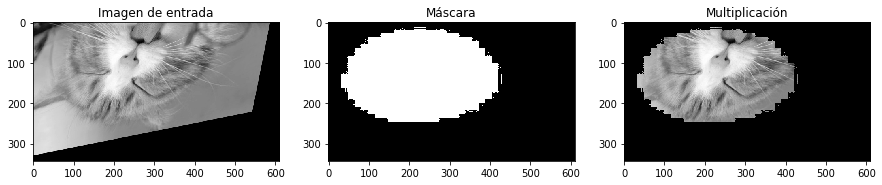

In [11]:
#Leer la máscara y normalizarla, cambiar su tipo de dato y ajustar su tamaño
mascara = cv2.imread('res/mascara2.png',cv2.IMREAD_GRAYSCALE)/255
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0])).astype(np.uint8)

#Operación multiplicar
out = cv2.multiply(inc, mascara)

#Figura 1x3 para mostrar imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Multiplicación')
ax1.imshow(inc, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


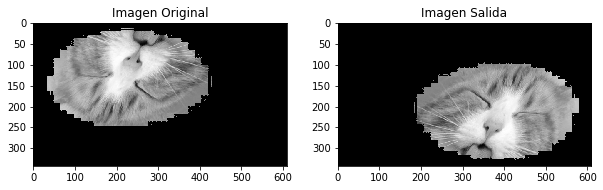

In [12]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot2 = cv2.warpAffine(out,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(out,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot2,cmap='gray')
plt.title("Imagen Salida");

Se leyó la última imagen de la transformación geométrica de inclinación, se usa la función máscara, se cambia su tipo de dato y  se ajusta su tamaño, luego se usa la operación multiplicación para sobreponer en la máscara la imagen de entrada. Para esta última imagen obtenida con el uso de la máscara se usó la misma operación de asignación de ángulo de rotación, eje de rotación, para rotar la imagen.

### b) Rotación y luego multiplicación

[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


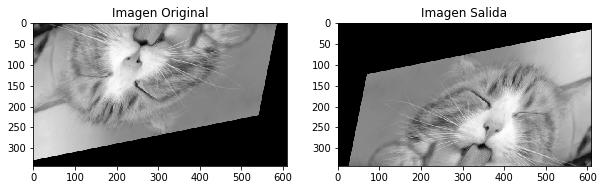

In [13]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rotinc = cv2.warpAffine(inc,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(inc,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rotinc,cmap='gray')
plt.title("Imagen Salida");

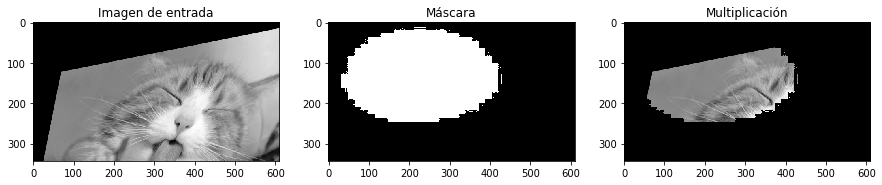

In [14]:
#Operación multiplicar
out = cv2.multiply(rotinc, mascara)

#Figura 1x3 para mostrar imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Multiplicación')
ax1.imshow(rotinc, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

La imagen de la operación 3 a se utiliza en este paso como inicio de imagen de lectura inicial para hacerle una nueva rotación con los pasos anteriormente desarrollados; a esta imagen se le hizo la máscara y luego su multiplicación.

# Solución Módulo II
## 1. Transformación exponencial

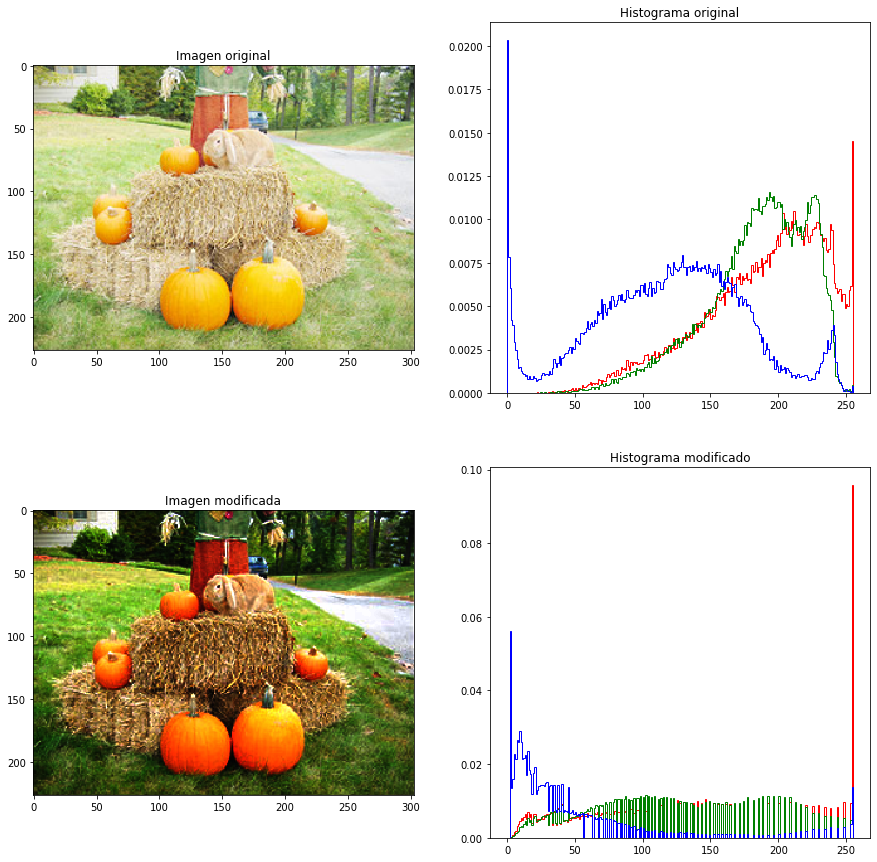

In [3]:

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (exponencial)
def exponencial(img, a, b, c):
    
    #Crear copia de la imagen con datos flotantes dado que se normalizarán
    img_copy = img.astype(np.float32)/255.0
    

    #Generar bx
    res_b = cv2.multiply(img_copy,b)
    #Sumar bx + c
    res_bc = cv2.add(res_b, c)
    #Generar exp(bx + c)
    res_exp = cv2.exp(res_bc)
    #Generar a * exp(bx + c)
    res = cv2.multiply(a, res_exp)
    
    #Asegurar que los datos queden entre 0 y 255 y regresar al dato uint8
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res 

#Leer la imagen en RGB
img = cv2.cvtColor(cv2.imread('res/calabazas.png'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,b,c (args)
a = 0.5
b = 5
c = -4

#Aplicar la transformación de la parábola sobre la imagen de entrada
res = apply_f_on_rgb(img, exponencial, [a, b, c])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

Se define la función que se le aplica a la imagen RGB, se crea una matriz de ceros, luego se le aplica la transformación f sobre cada canal del espacio de color RGB, se define la transformación de la imagen exponencial generando paso a paso con sus variables (a,b y c); se lee la imagen RGB que se le hara la transformación y luego generar el subplot.
El histograma original nos muestra una distribución variable en las tonalidades de los grises mirando así una imagen con poco contraste, al aplicarle esta función se ve una ecualización del histograma quiere decir que tenemos una distribución uniforme en los tonos de grises viendo una imagen mejorada por contraste.


## 2. Ecualizaciones
### a) Ecualización exponencial

<Figure size 432x288 with 0 Axes>

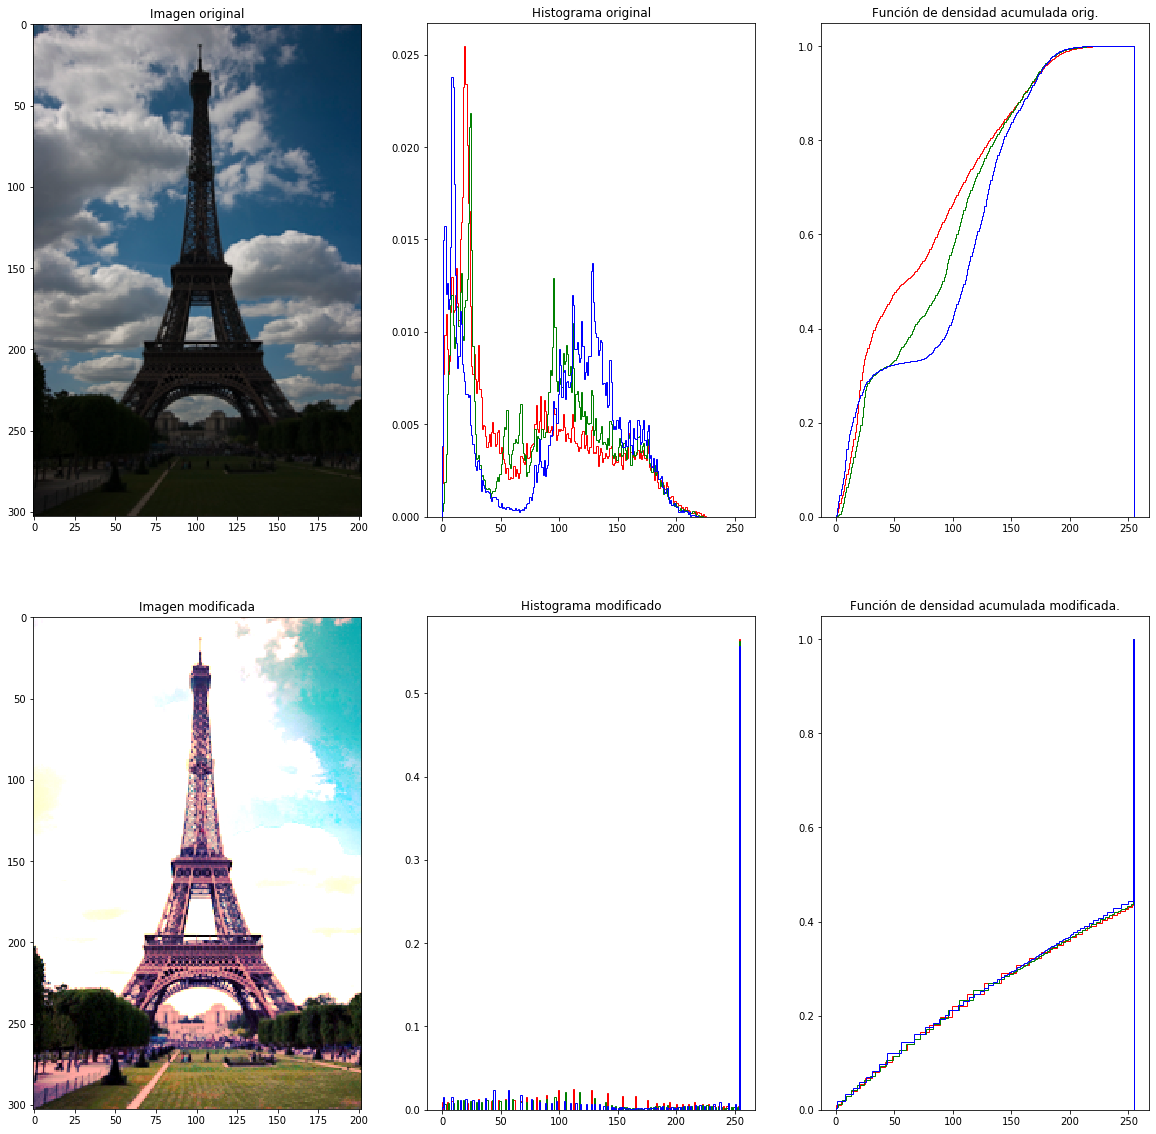

In [48]:

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization_exp(img, a):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), density=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = -gmin - (1/a)*np.log((1 - cdf[g]) + 1e-10)*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Parámetro alpha
a = 0.5
#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization_exp, [a])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = True)

La ecualización exponencial busca dar una distribución exponencial al histograma de los canales de color, logrando así que los valores en la escala de grises al ser exponencialmente distribuidos se concentren en valores más cercanos al 255(luminosos).

### b) Ecualización de Rayleigh

c:\users\eliana\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less
c:\users\eliana\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater


<Figure size 432x288 with 0 Axes>

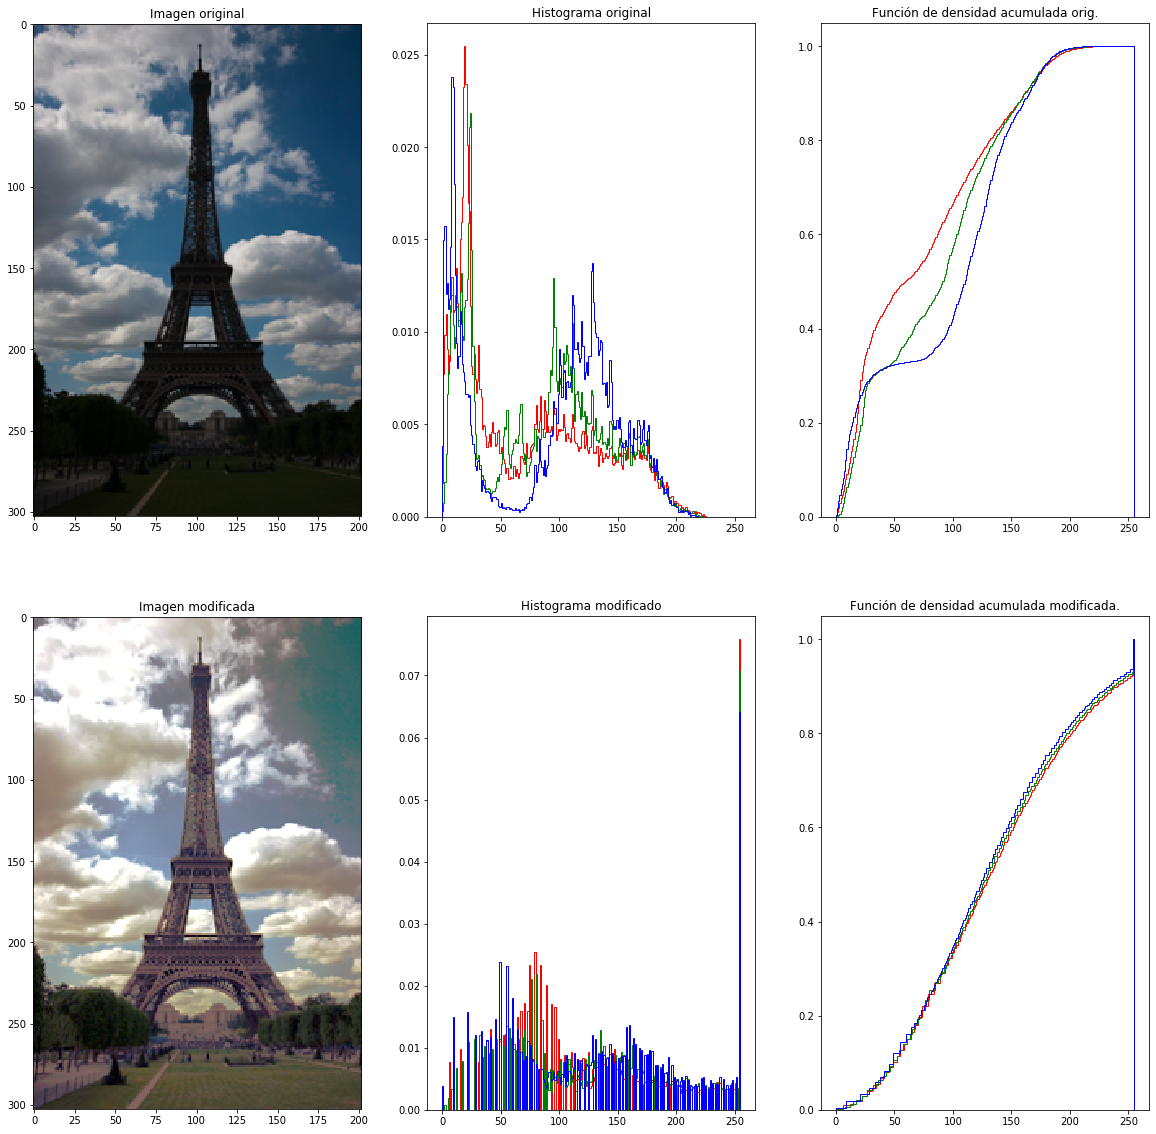

In [68]:
#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization_ray(img, a):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), density=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = gmin + np.sqrt(-2 * np.power(a,2) * np.log((1 - cdf[g]) + 1e-10)) * (gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Parámetro alpha
a = 0.5
#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization_ray, [a])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = True)

La ecualización de Rayleigh busca que los valores en escala de grises sigan una distribución Rayleigh, la cuál logra destacar los valores extremos de ese histograma(los más oscuros y los más claros)

## 3. Transformación Gamma

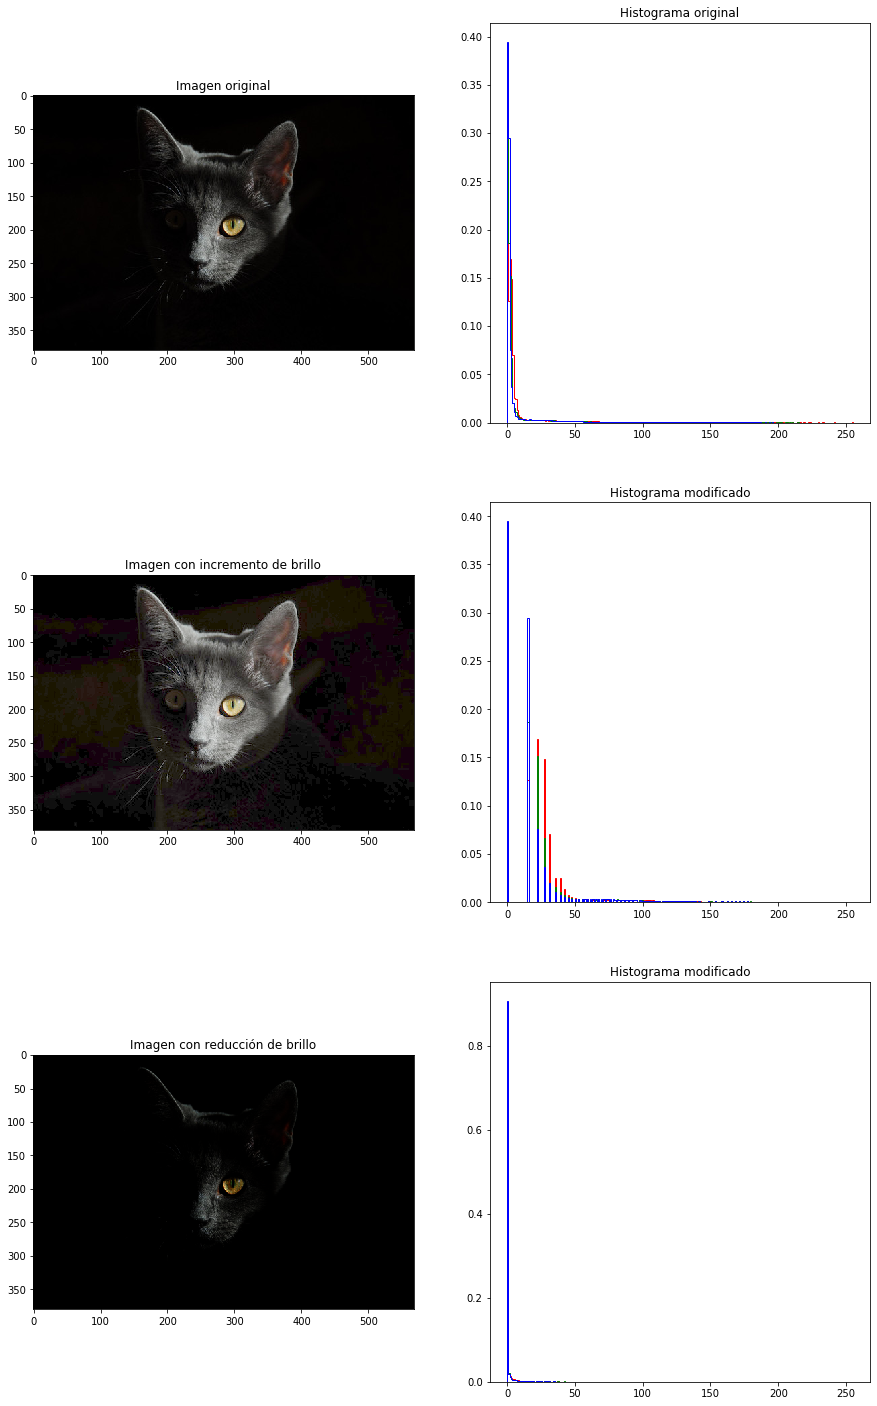

In [74]:
#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = .5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 2.5

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

Los valores de gamma mayores a 1 oscurecen la imagen y los valores menores a 1 aclaran la imagen(ley de potencias para la transformación gamma)

# Solución Módulo III
## 1. Convolución

El resultado de aplicar la convolución en img(1,1) es: 253


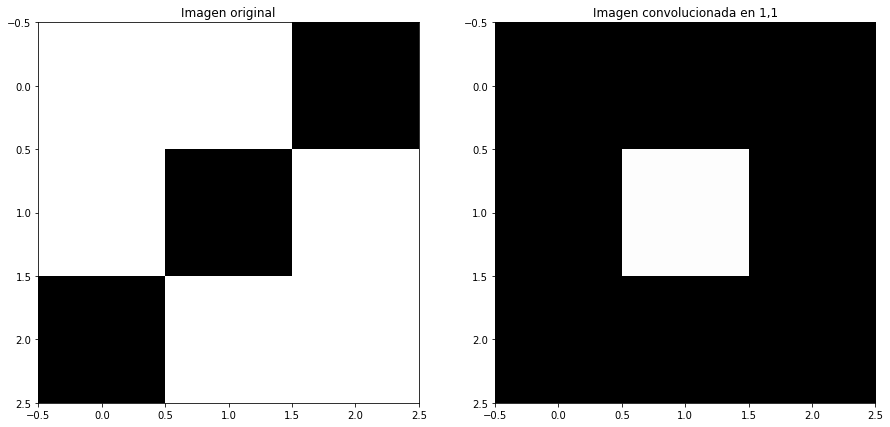

In [75]:
#Imagen de entrada, creada artificialmente
img = np.array([[255,255,0],
              [255,0,255],
              [0,255,255]], dtype=np.uint8)

#Posición (x,y)
x = 1
y = 1

#Máscara de convolución
w = np.array([[1/2,1/2,1/2],
              [1/2,1/2,1/2],
              [1/2,1/2,1/2]], dtype=np.float64)

k = 1 #el radio del kernel

#Crear una matriz de ceros del mismo tamaño de la imagen de entrada, datos flotantes
res = np.zeros(img.shape, dtype=np.float64)

#Recorrer todos los valores i,j de la imagen, en el intervalo del radio del kernel
for i in range(-k, k+1):
    for j in range(-k, k+1):
        #Resultado de la convolución en la posición 1,1
        res[1][1] += img[x+i][y+j] * w[k+i][k+j]
        
#Volver al tipo de dato uint8
res=res.astype(np.uint8)

print("El resultado de aplicar la convolución en img(1,1) es:", res[1][1])

#Generar subplot 1x2 para mostrar imagen original y convolucionada en 1,1
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada en 1,1')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

Se obtiene la media móvil de la máscara y la imagen original con bordes negros y centro blanco.